# Libraries 📖

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import squarify
import math

# Database 📂

In [2]:
conn = sqlite3.connect("../data/olist.sqlite")
c = conn.cursor()

In [3]:
# write the query
query = """
SELECT
    rcr.RANK, 
	p.product_category_name,
    ROUND(Avg(julianday(o.order_delivered_customer_date)- julianday(o.order_approved_at)),0) AS avg_delivery_time,
    ROUND(AVG(gld.distance_km),0) AS avg_dist_km
FROM orders o
INNER JOIN order_items oi ON oi.order_id = o.order_id
INNER JOIN order_reviews or2 ON or2.order_id = o.order_id 
INNER JOIN geo_loc_det gld ON gld.order_id = o.order_id
INNER JOIN products p ON p.product_id = oi.product_id
INNER JOIN rev_cat_rank rcr ON rcr.product_category_name = p.product_category_name
WHERE o.order_status == 'delivered' AND 
p.product_category_name IS NOT NULL
GROUP BY p.product_category_name
ORDER BY rcr.RANK ;
"""
# Execute the query
c.execute(query)
#Fetch and print the results
c.fetchall()
df = pd.read_sql_query(query, conn)

In [8]:
query = """
	SELECT
	    MAX(oi.order_item_id) AS item_per_order,
	    ROUND(julianday(o.order_delivered_customer_date)- julianday(o.order_approved_at),0) AS delivery_time,
	    ROUND(gld.distance_km,0) AS dist_km,
	    p.product_category_name
	FROM orders o
	INNER JOIN order_items oi ON oi.order_id = o.order_id
	INNER JOIN order_reviews or2 ON or2.order_id = o.order_id 
	INNER JOIN order_payments op ON op.order_id = o.order_id
	INNER JOIN geo_loc_det gld ON gld.order_id = o.order_id
	INNER JOIN products p ON p.product_id = oi.product_id 
	WHERE o.order_status == 'delivered' AND 
	p.product_category_name IS NOT NULL
	GROUP BY oi.order_id
"""
c.execute(query)
c.fetchall()
df_tf = pd.read_sql_query(query, conn)

# Analysis

## Data exploration

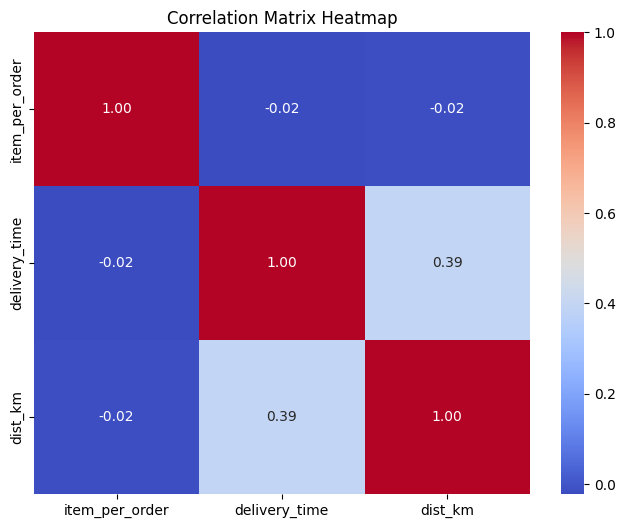

In [9]:
# Plotting the correlation matrix as a heatmap
correlation_matrix = df_tf.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

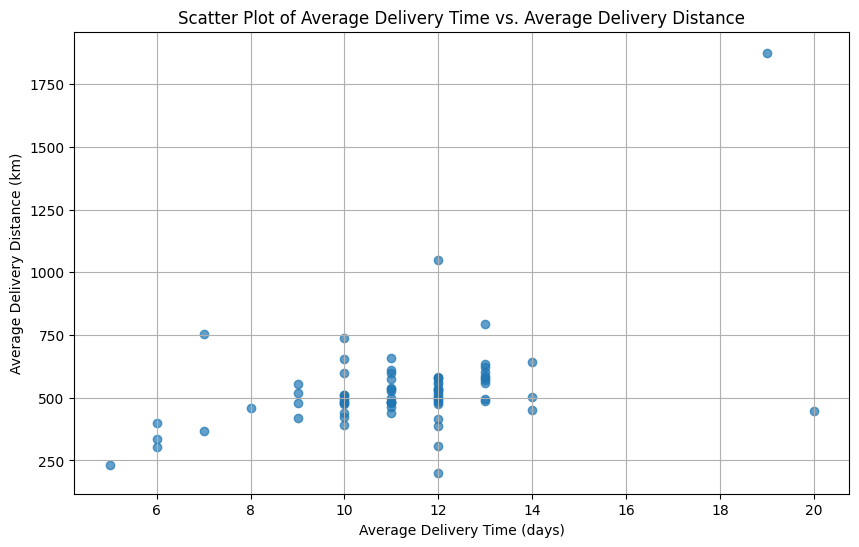

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['avg_delivery_time'], df['avg_dist_km'], alpha=0.7)
plt.title("Scatter Plot of Average Delivery Time vs. Average Delivery Distance")
plt.xlabel("Average Delivery Time (days)")
plt.ylabel("Average Delivery Distance (km)")
plt.grid(True)
plt.show()

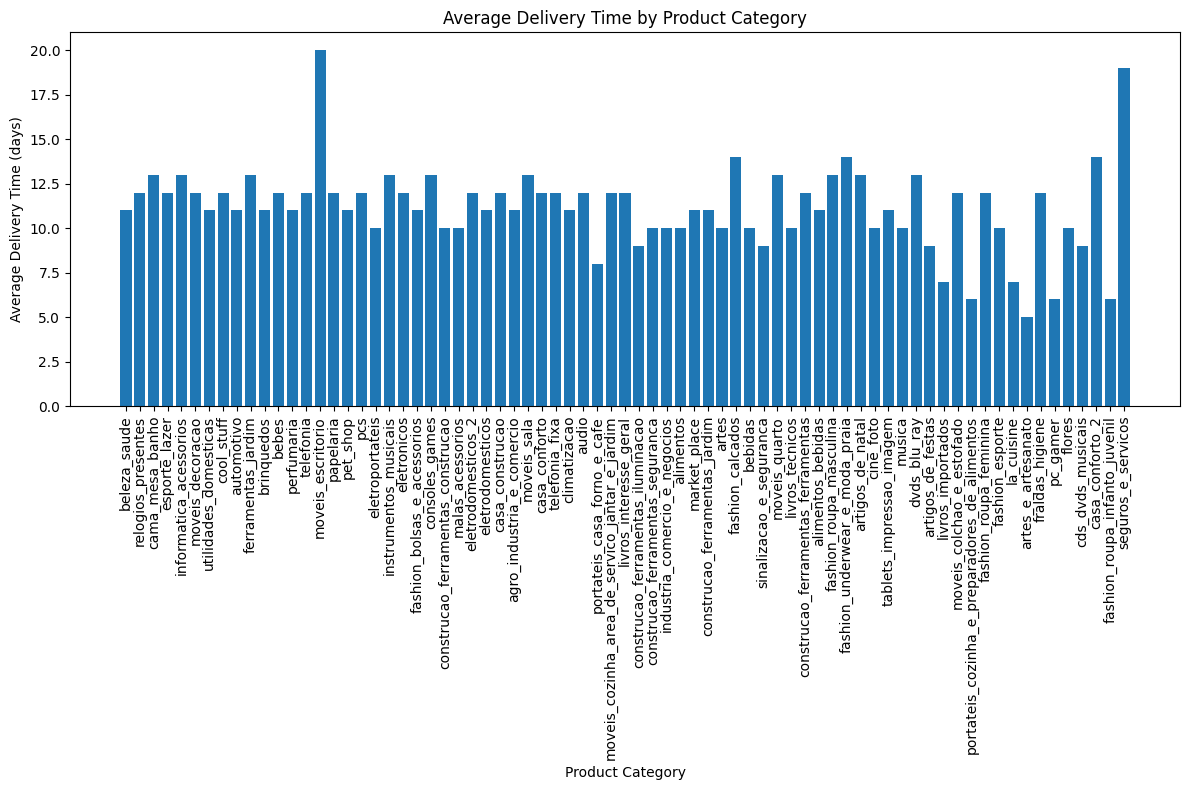

In [4]:
# Plotting
plt.figure(figsize=(12, 8))
plt.bar(df["product_category_name"], df["avg_delivery_time"])
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Average Delivery Time (days)")
plt.title("Average Delivery Time by Product Category")
plt.tight_layout()
plt.show()

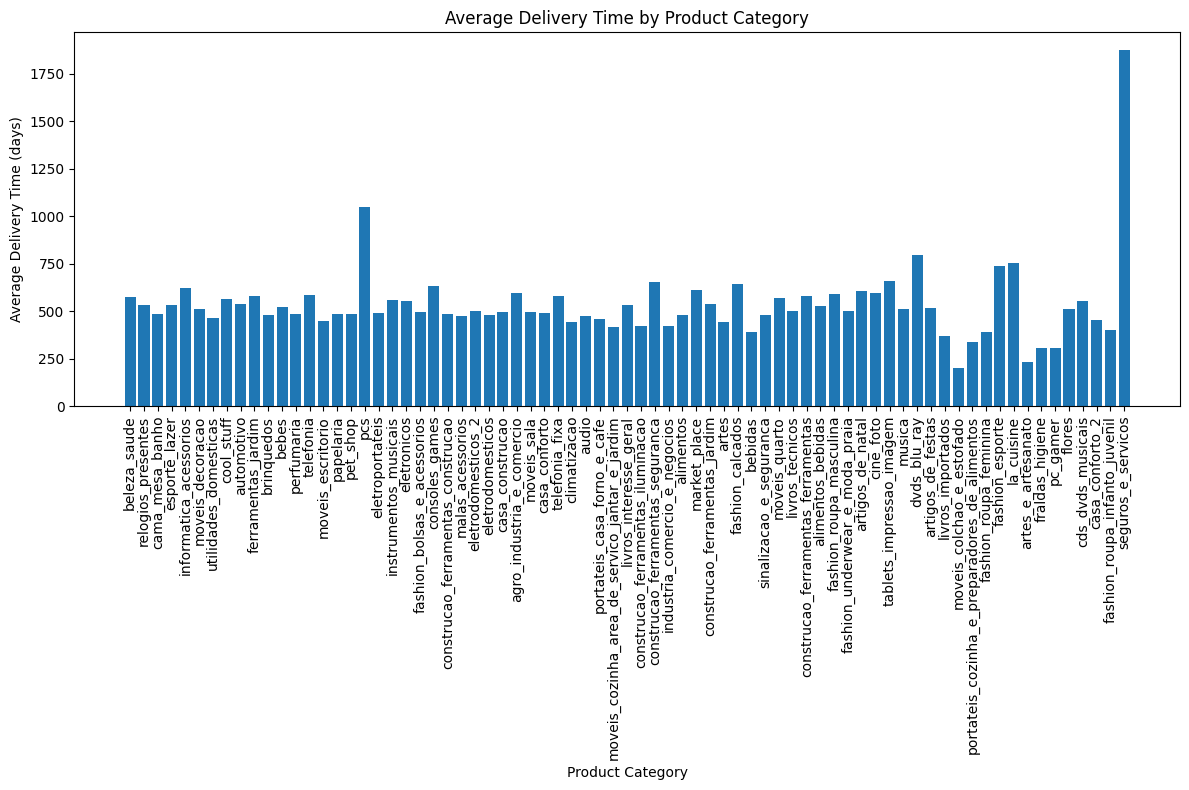

In [5]:
# Plotting
plt.figure(figsize=(12, 8))
plt.bar(df["product_category_name"], df["avg_dist_km"])
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Average Delivery Time (days)")
plt.title("Average Delivery Time by Product Category")
plt.tight_layout()
plt.show()